In [1]:
import pandas as pd

# (1) Используя параметры pandas прочитать красиво пандас 

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv', sep=',', index_col='ID') #TODO
#считывание файла 'UCI_Credit_Card.csv' в DataFrame - 'df', столбец 'ID' как index

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# (2) выведите, что за типы переменных, сколько пропусков, для численных значений посчитайте пару статистик (в свободной форме)

In [4]:
# (2) выведите, что за типы переменных, сколько пропусков, для численных значений посчитайте пару статистик (в свободной форме)

#TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

Всего 24 переменные из них float64 - 13, int64 - 11
Всего 3000 строк, ни одного пропуска нет

In [5]:
df[['LIMIT_BAL', 'SEX', 'AGE']].describe()

,LIMIT_BAL,SEX,AGE
count,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,35.485500
std,129747.661567,0.489129,9.217904
min,10000.000000,1.000000,21.000000
25%,50000.000000,1.000000,28.000000
50%,140000.000000,2.000000,34.000000
75%,240000.000000,2.000000,41.000000
max,1000000.000000,2.000000,79.000000


In [6]:
print('Средний возраст: %.2f' % df['AGE'].mean())
print('Лимит Max: %.2f' % df['LIMIT_BAL'].max())
print('Лимит Min: %.2f' % df['LIMIT_BAL'].min())
print('Лимит среднее: %.2f' % df['LIMIT_BAL'].mean())

Средний возраст: 35.49
Лимит Max: 1000000.00
Лимит Min: 10000.00
Лимит среднее: 167484.32


# (3) посчитать число женщин с университетским образованием

In [7]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
print ('Всего', df['SEX'][(df.EDUCATION == 2) & (df.SEX == 2)].count(), 'женщин с университетским образованием')

Всего 8656 женщин с университетским образованием


# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_

In [8]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

# формируем перечень 'Columns_Name' всех требуемых показателей ('BILL_*', 'PAY_*') + "default payment next month"
Columns_Name = df.columns
Columns_Name = Columns_Name[(Columns_Name.str.startswith('BILL_')) | 
                            (Columns_Name.str.startswith('PAY_')) | 
                            (Columns_Name == 'default.payment.next.month')] 
#группируем и выводим медиану по требуемым параметрам
df[Columns_Name].groupby('default.payment.next.month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

In [9]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

#TODO

#для удобства восприятия значения SEX и EDUCATION меняются на строковые
#определяю словари для значений пола и образования
SEX_string = {1: 'male', 2: "femail"}
EDUCATION_string = {1:'(1)graduate school', 
                    2:'(2)university', 
                    3: '(3)high school', 
                    4: '(4)others', 
                    5: '(5)others', 
                    6: '(6)others'} 

#добавляем строковые значения в DataFrame
df['SEX_str'] = df['SEX'].map(SEX_string)
df['EDUCATION_str'] = df['EDUCATION'].map(EDUCATION_string)

#строим сводную таблицу 
df.pivot_table(values = ['LIMIT_BAL'], 
               index = ['EDUCATION_str', 'SEX_str'], 
               columns=['MARRIAGE'], 
               aggfunc='mean', 
               fill_value='--')

LIMIT_BAL                                       
MARRIAGE                           0              1              2        3
EDUCATION_str      SEX_str                                                 
(1)graduate school femail     160000  245319.881890  190821.360153   184000
                   male       300000  262485.207101  192085.074060   165333
(2)university      femail     166000  164180.679785  146840.686275  96363.6
                   male       360000  162101.265823  112442.176871  70952.4
(3)high school     femail     126562  129387.755102  135674.876847  78059.7
                   male      96666.7  140143.129771  100847.516779  69166.7
(4)others          femail         --  247941.176471  222000.000000   235000
                   male           --  230000.000000  173478.260870   150000
(5)others          femail         --  185784.313725  157901.234568   110000
                   male           --  209916.666667  107608.695652   100000
(6)others          femail         --  153571.428571  111000.000000   185000
                   male           --  165714.285714  146363.636364       --

# (6) Создать новый строковый столбец в data frame-е,

In [10]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def Limit_classify(limit):
    if limit <= 10000:
        return 'A'
    elif limit <= 100000:
        return 'B'
    elif limit <= 200000:
        return 'C'
    elif limit <= 400000:
        return 'D'
    elif limit <= 700000:
        return 'E'
    else:
        return 'F'
df['LIMIT_BAL_CLASSIFY'] = df['LIMIT_BAL'].apply(Limit_classify)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_str,EDUCATION_str,LIMIT_BAL_CLASSIFY
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,femail,(2)university,B
2,120000.0,2,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,femail,(2)university,C
3,90000.0,2,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,femail,(2)university,B
4,50000.0,2,2,1,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,femail,(2)university,B
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,male,(2)university,B


In [11]:

%matplotlib inline

import matplotlib.pyplot as plt

# (7) постироить распределение LIMIT_BAL (гистрограмму)

In [12]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
# график необходимо сделать очень широким (на весь экран)
#TODO

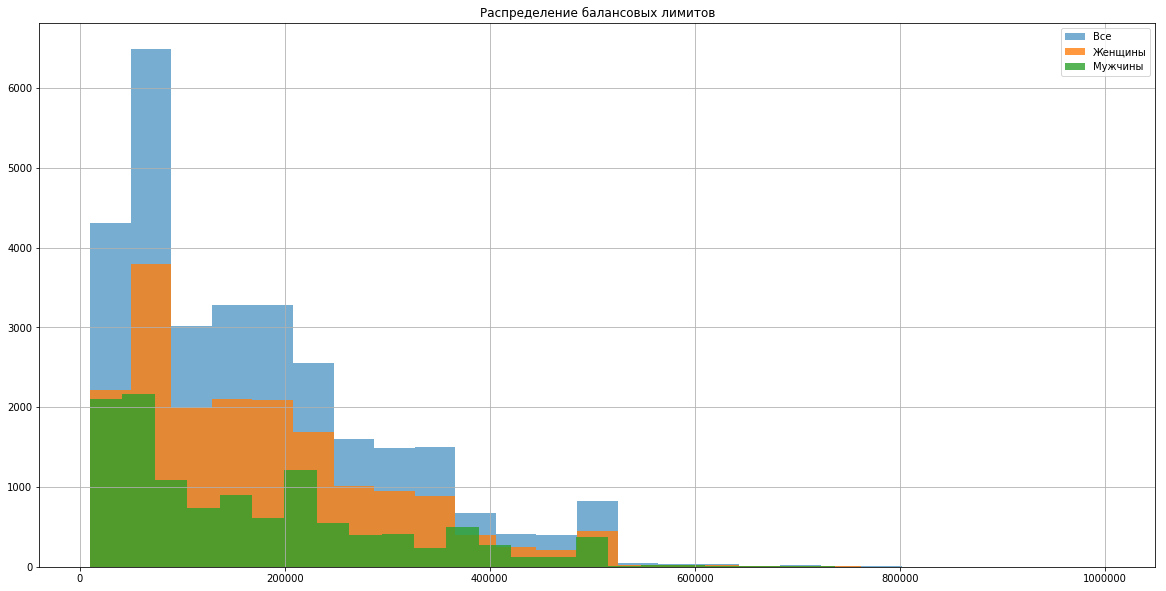

In [13]:
#Строим три распределения 'LIMIT_BAL', где SEX: все, женщины, мужчины

df['LIMIT_BAL'].hist(alpha=0.6, bins=25, label="Все", figsize=(20,10)) #TODO
df['LIMIT_BAL'][df.SEX == 2].hist(alpha=0.8, bins=25, label="Женщины") 
df['LIMIT_BAL'][df.SEX == 1].hist(alpha=0.8, bins=25, label="Мужчины") 
plt.title("Распределение балансовых лимитов");
plt.legend()

# (9) построить зависимость кредитного лимита и образования только для одного из полов

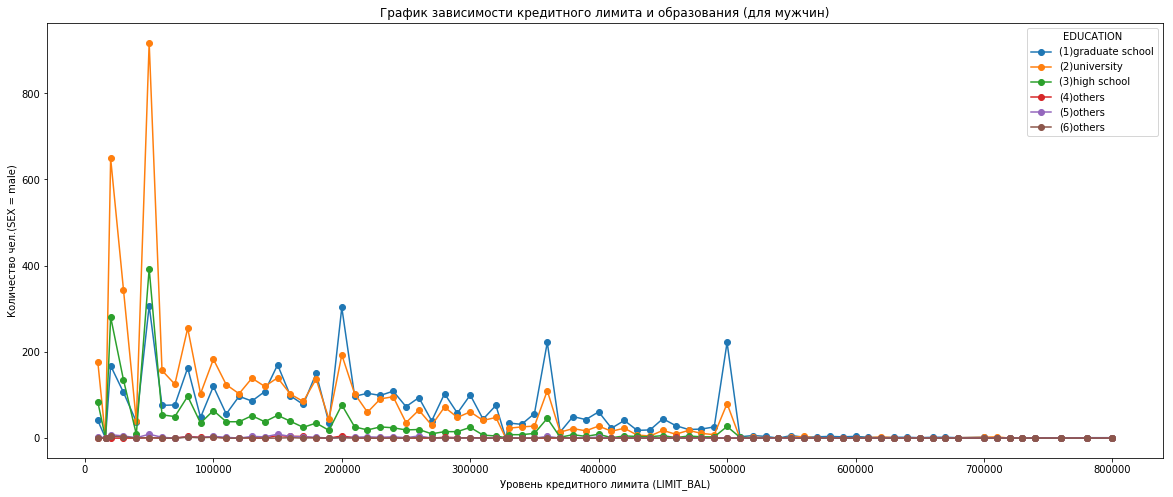

In [14]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

#пол выбираем 'мужской'
#строим графики - количество мужчин с кредитным лимитом 'LIMIT_BAL' для уровней образования EDUCATION

#отбор данных для построения графика (образование и кредитный лимит) для мужского пола 'SEX'=1
df_male = df[['EDUCATION', 'LIMIT_BAL', 'SEX' ]][df['SEX'] == 1] 

#для удобства восприятия меняем в 'EDUCATION' значения с цифр на текстовые
df_male['EDUCATION'] = df_male['EDUCATION'].map(EDUCATION_string)

#Строим график
_, ax = plt.subplots(figsize=(20,8))
df_male.pivot_table(
    values='SEX', 
    index='LIMIT_BAL', 
    columns='EDUCATION', 
    aggfunc='count', fill_value=0
).plot(ax=ax, marker='o')

plt.title('График зависимости кредитного лимита и образования (для мужчин)')
plt.xlabel('Уровень кредитного лимита (LIMIT_BAL)')
plt.ylabel('Количество чел.(SEX = male)')

plt.show()

Предыдущий график (кредитный лимит/образование) получился не очень удобный, строим через 'ящик с усами'

[Text(0,0.5,'Размер кредитного лимита'),
 Text(0.5,0,'Уровень образования'),
 Text(0.5,1,'Зависимость кредитного лимита от образования для Женщин')]

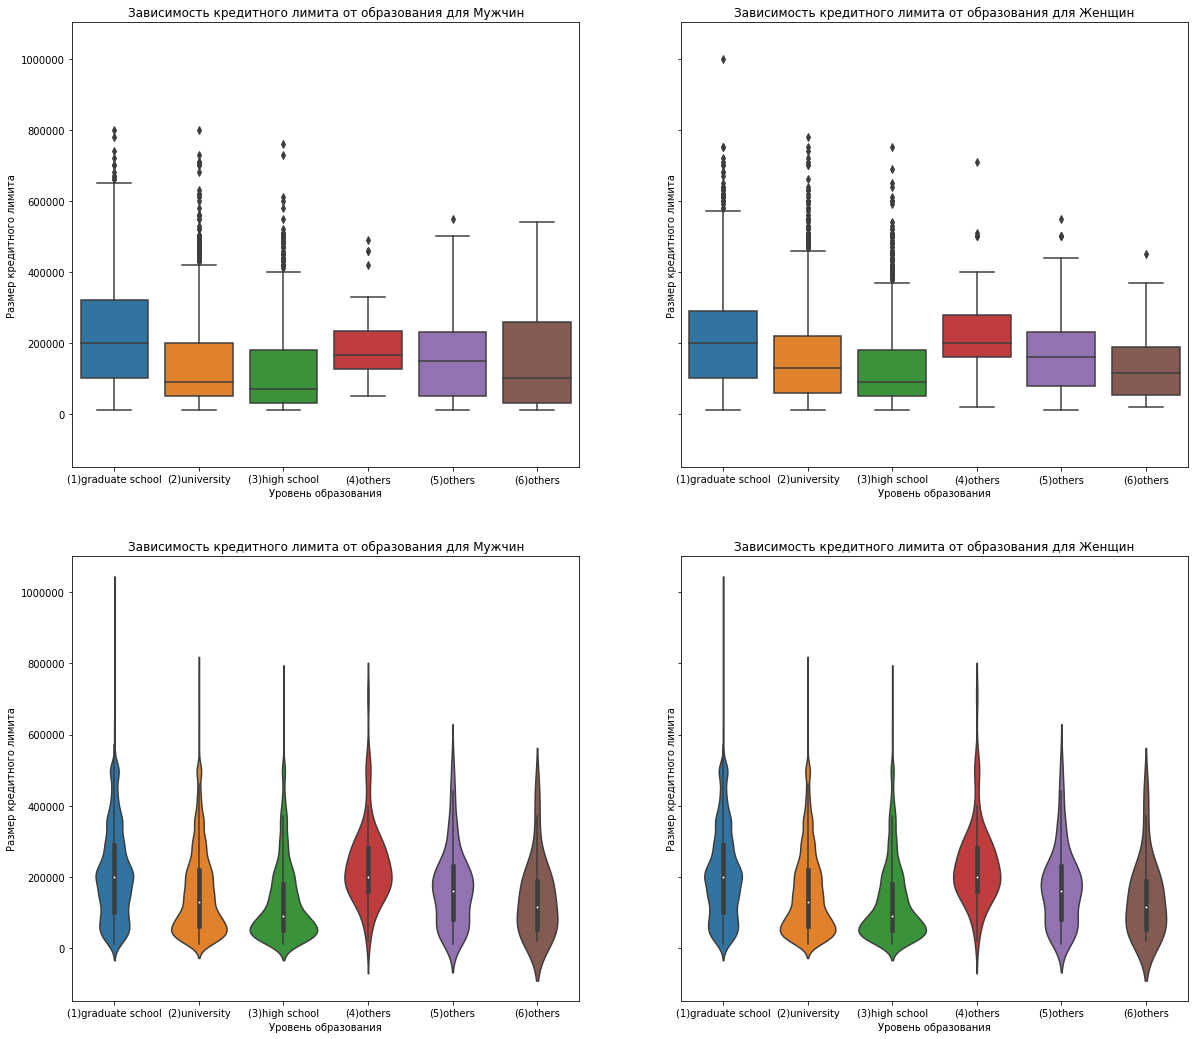

In [15]:
#отключил предупреждения, замучали
import warnings
warnings.simplefilter('ignore')

import seaborn as sns

_, axes = plt.subplots(2, 2, sharey=True, figsize=(20,18))

#
#рисуем ящик с усами для мужчин
#
box_plot = sns.boxplot(
    x='EDUCATION_str', 
    y='LIMIT_BAL', 
    data=df[df.SEX == 1].sort_values('EDUCATION_str'), 
    ax=axes[0,0]
)
#именуем диаграму и оси
box_plot.set(
    xlabel='Уровень образования', 
    ylabel='Размер кредитного лимита',
    title ='Зависимость кредитного лимита от образования для Мужчин'
)

#
#рисуем ящик с усами для женщин
#
box_plot = sns.boxplot(
    x='EDUCATION_str', 
    y='LIMIT_BAL', 
    data=df[df.SEX == 2].sort_values('EDUCATION_str'), 
    ax=axes[0,1]
)
#именуем диаграму и оси
box_plot.set(
    xlabel='Уровень образования', 
    ylabel='Размер кредитного лимита',
    title ='Зависимость кредитного лимита от образования для Женщин'
)

#
#рисуем violin для мужчин
#
violin_plot = sns.violinplot(
    x='EDUCATION_str', 
    y='LIMIT_BAL', 
    data=df[df.SEX == 2].sort_values('EDUCATION_str'),
    ax=axes[1,0]
)
#именуем диаграму и оси
violin_plot.set(
    xlabel='Уровень образования', 
    ylabel='Размер кредитного лимита',
    title ='Зависимость кредитного лимита от образования для Мужчин'
)

#
#рисуем violin для женщин
#
violin_plot = sns.violinplot(
    x='EDUCATION_str', 
    y='LIMIT_BAL', 
    data=df[df.SEX == 2].sort_values('EDUCATION_str'),
    ax=axes[1,1]
)

#именуем диаграму и оси
violin_plot.set(
    xlabel='Уровень образования', 
    ylabel='Размер кредитного лимита',
    title ='Зависимость кредитного лимита от образования для Женщин'
)

'Ящик с усами' и 'Violin' получились более наглядными
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров

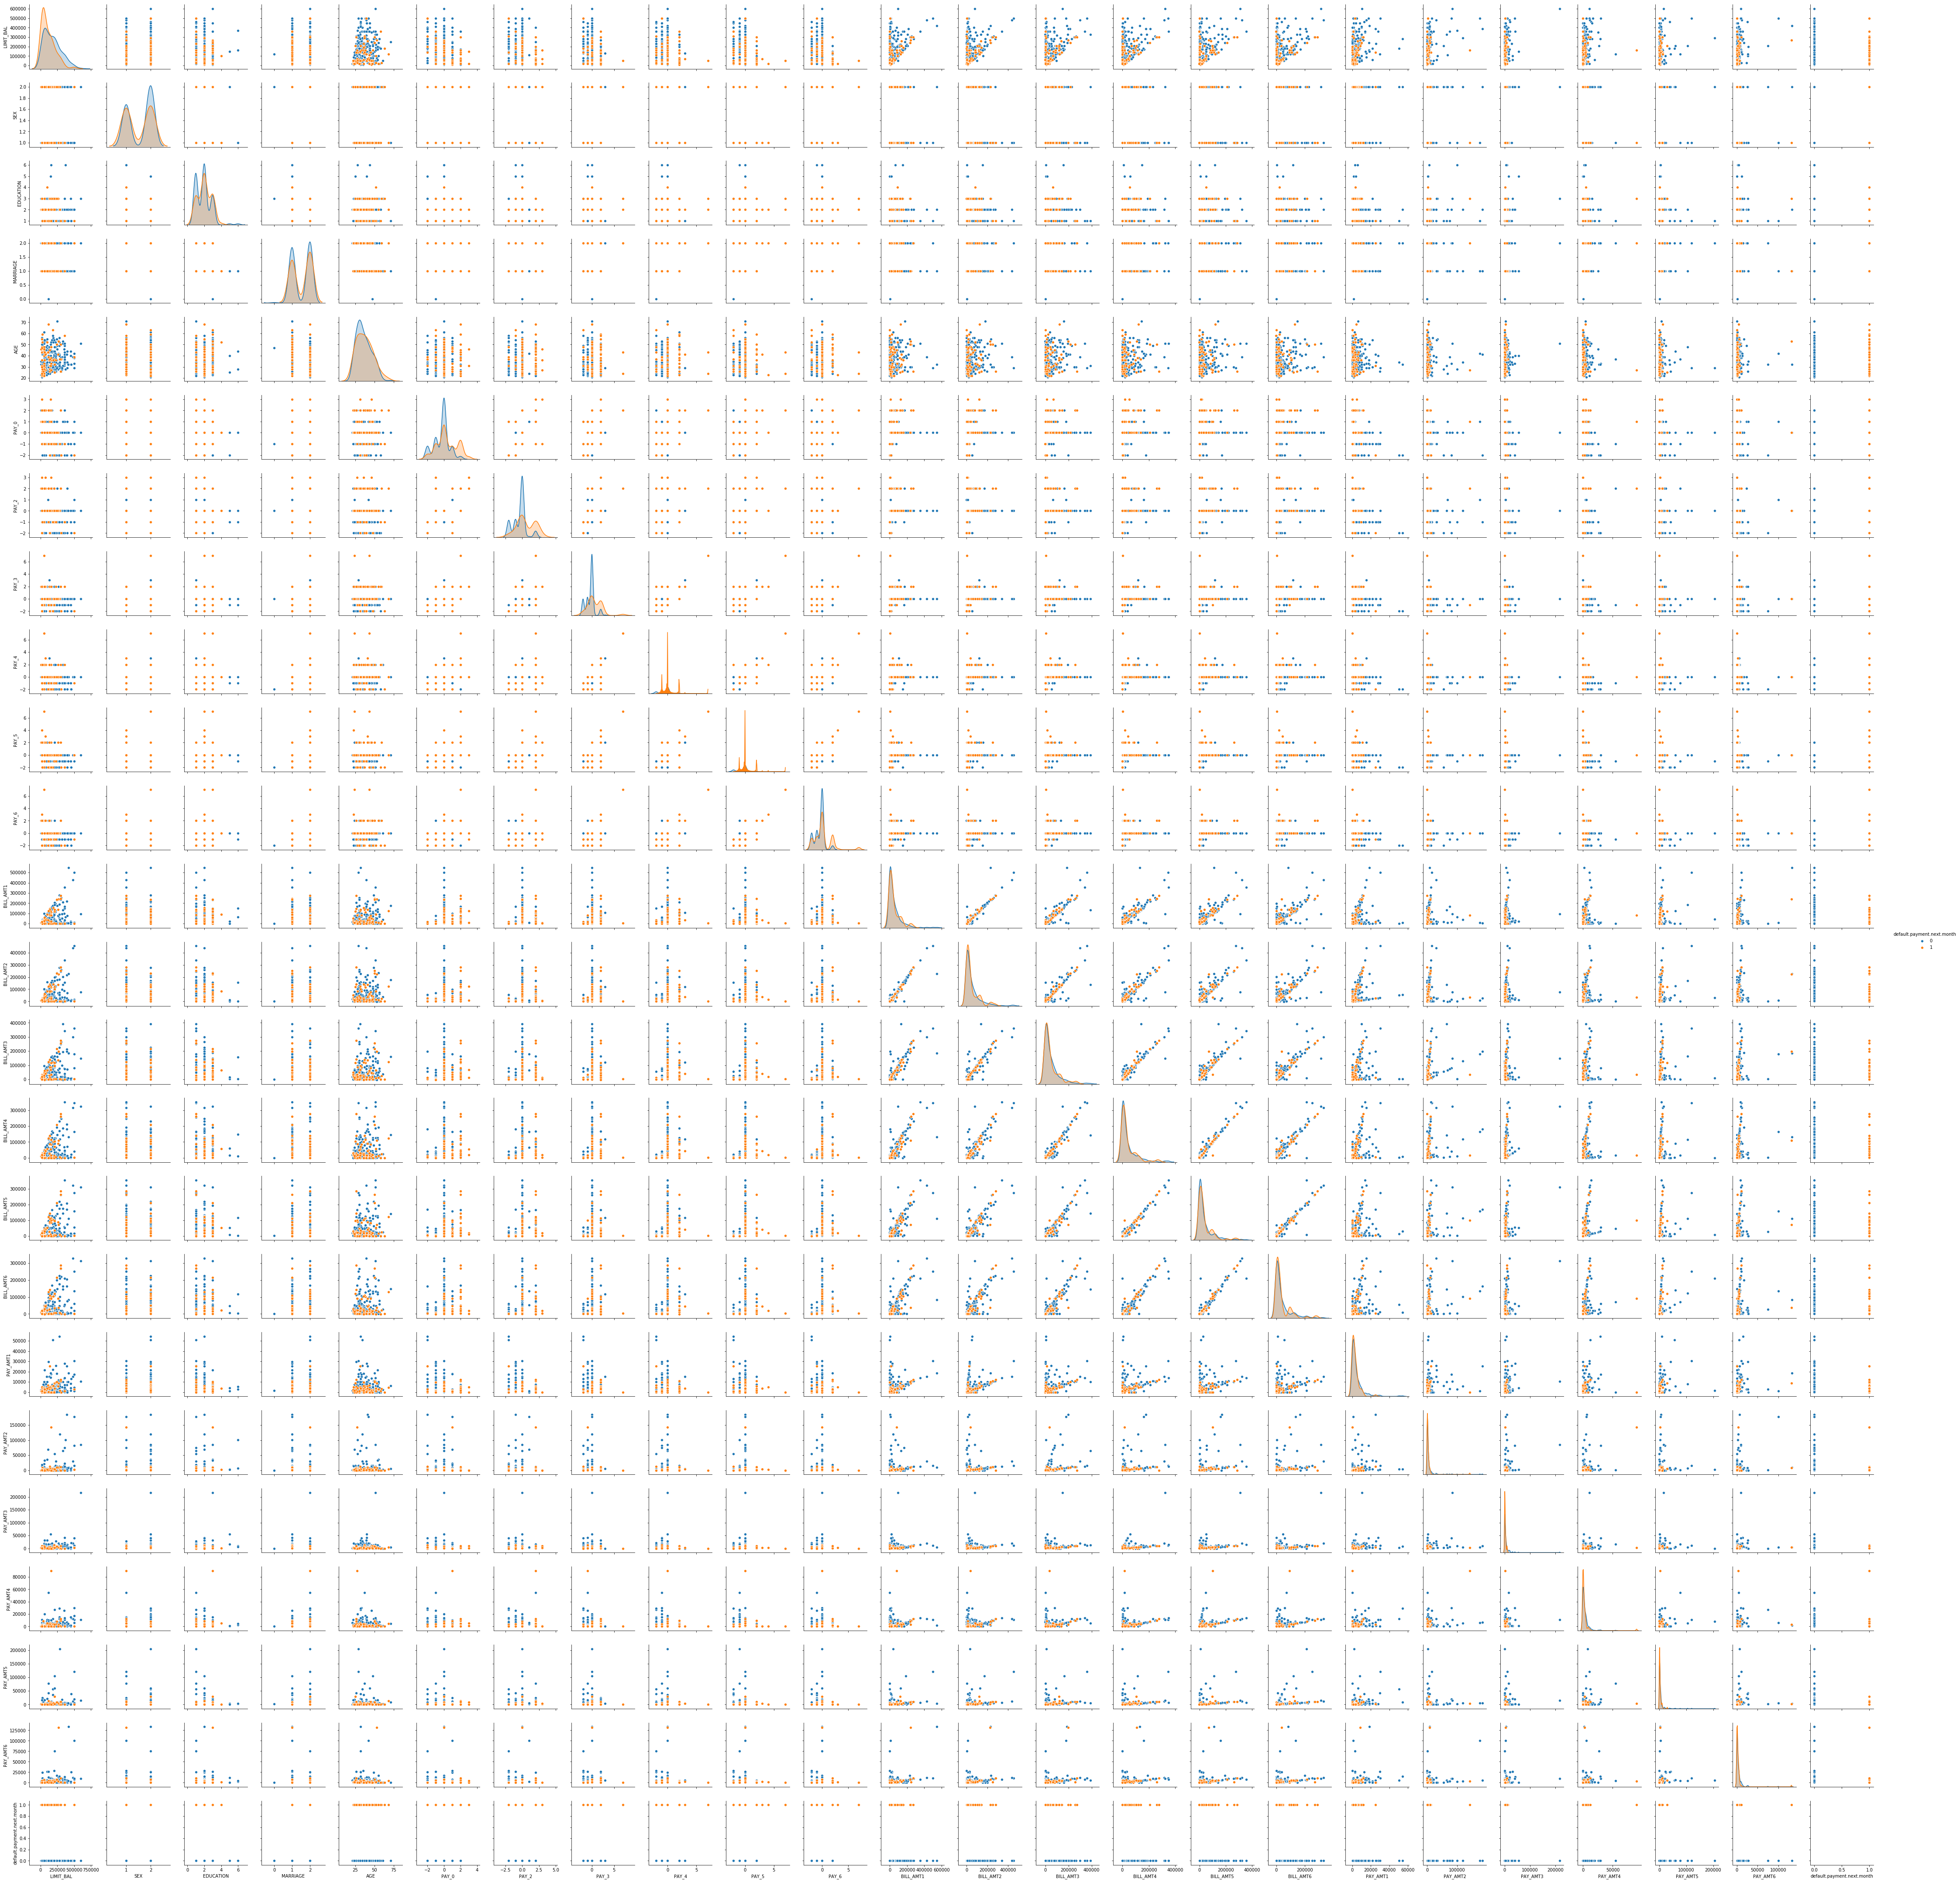

In [16]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

#TODO

sns.pairplot(df.sample(300), hue='default.payment.next.month')

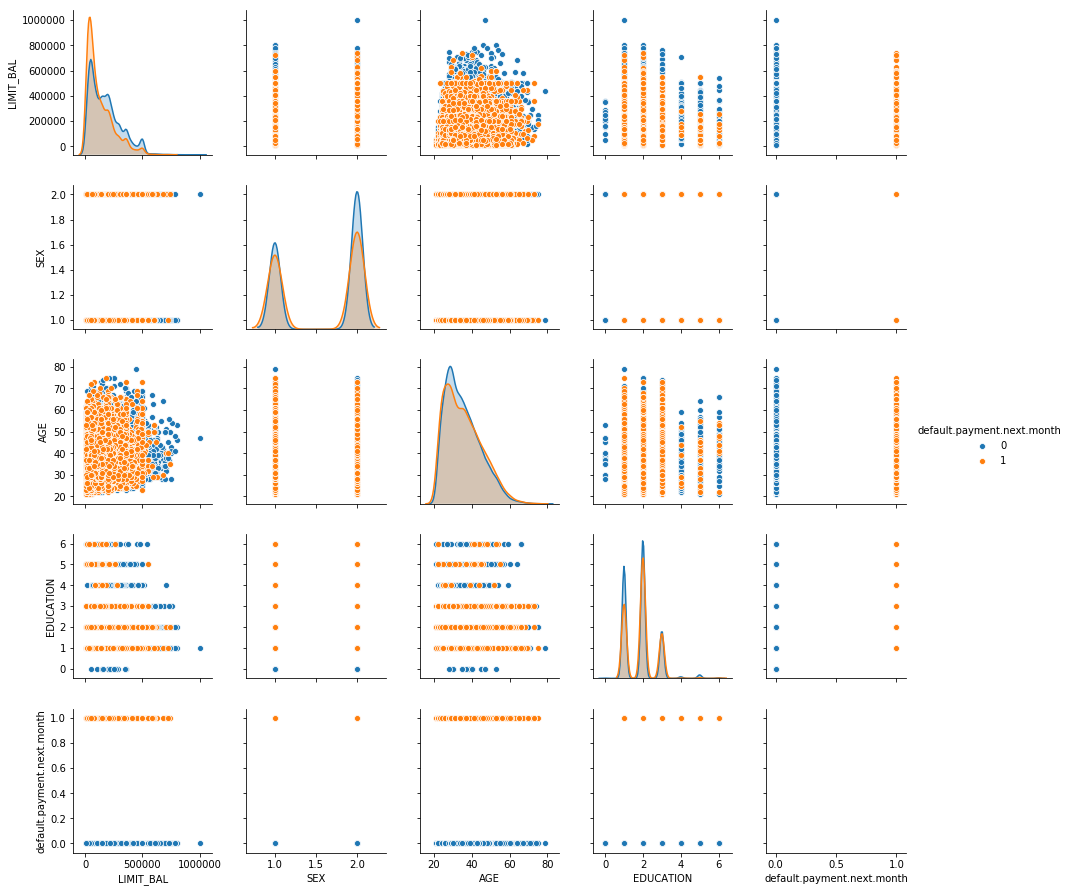

In [17]:
columns_tmp = ['LIMIT_BAL','SEX', 'AGE', 'EDUCATION', 'default.payment.next.month'] #выбор переменных для выборки
sns.pairplot(df[columns_tmp], hue='default.payment.next.month')

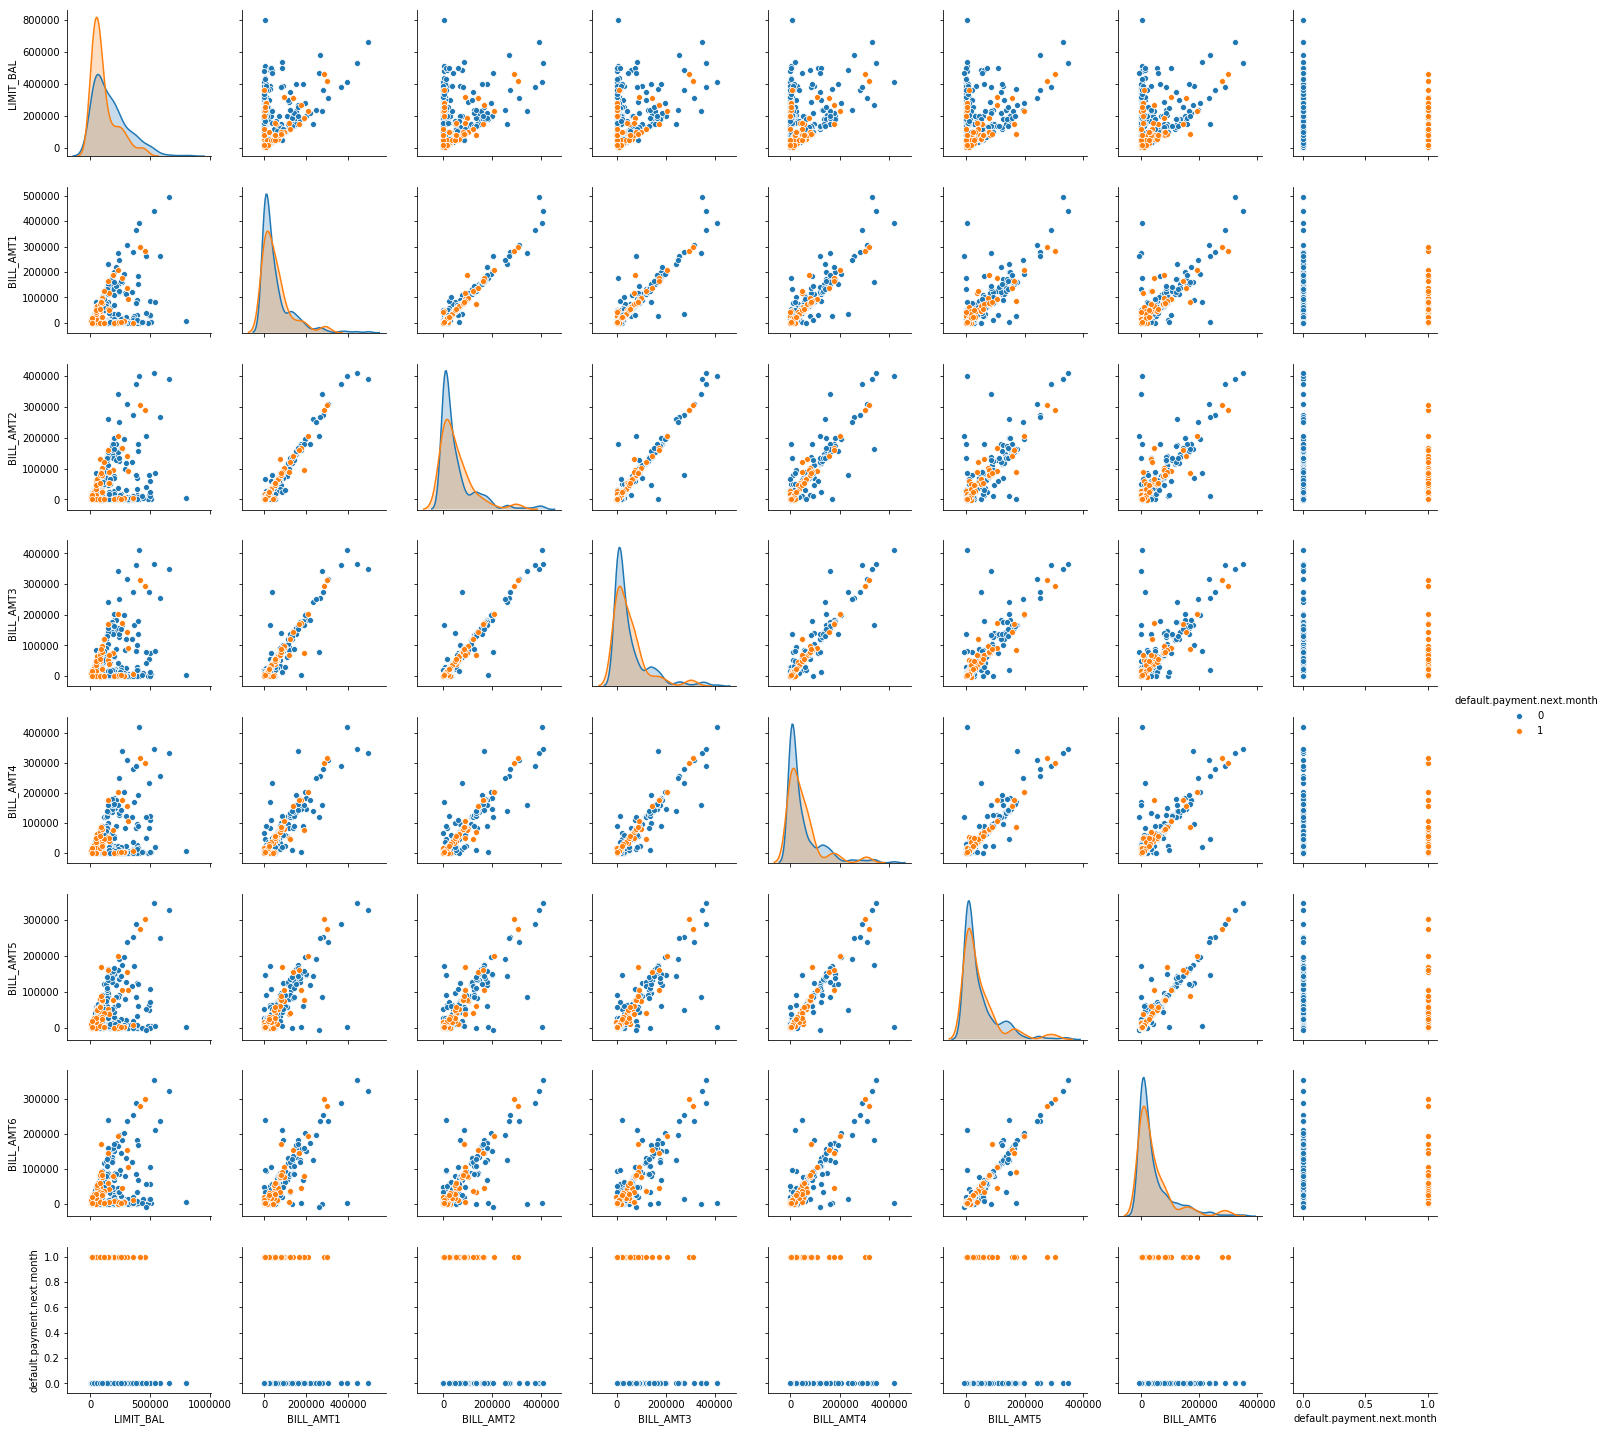

In [18]:
columns_tmp = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default.payment.next.month']

sns.pairplot(df[columns_tmp].sample(300), hue='default.payment.next.month')